In [44]:
# Cтруктурное разрушения случайного графо


import networkx as nx
import matplotlib.pyplot as plt
import random

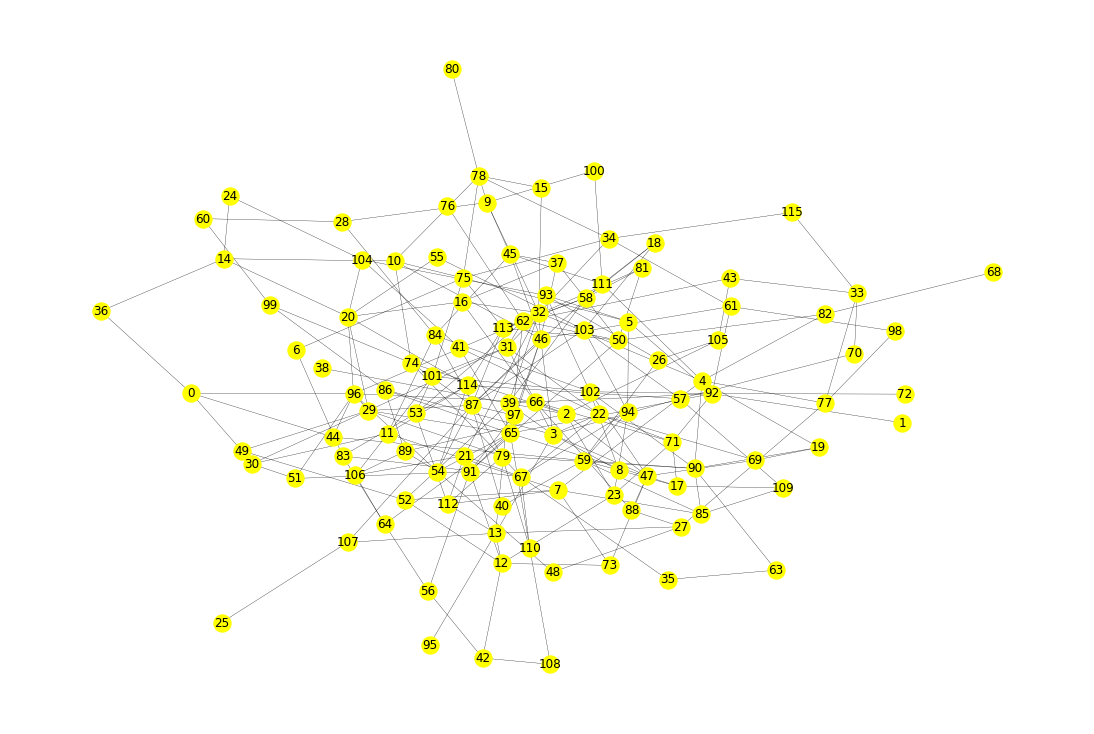

In [45]:
# Очищаем переменную 
G.clear()

# Создаем случайный граф размерностью nodes = 116 и количеством edges = 250  
G=nx.gnm_random_graph(116,250, seed=2)

# Визуализируем граф
pos = nx.spring_layout(G)
plt.figure(figsize=(15, 10))
nx.draw(G, pos=pos, with_labels=True, node_size=300, width=0.3, node_color='yellow')  # width=0.3 - толщина линий ; node_size=300 - размер вершин

In [46]:
# Задаем случайные веса
list_of_current_weight = random.choices(range(5,9), k=116)

list_of_current_weight = { i : list_of_current_weight[i] for i in range(0, len(list_of_current_weight) ) }



In [47]:
# Устанавливаем веса для графа
nx.set_node_attributes(G, list_of_current_weight, 'current_weight')

In [48]:
# Вводим 2 эпицентра
random_two_epicenters = random.sample(range(0,116), k=2)
random_two_epicenters

for i in random_two_epicenters:
    G.nodes[i]['current_weight'] = max_load

In [49]:
# Задаем красный цвет для эпицентров
color_map = ['red' if node == max_load else 'yellow' for node in nx.get_node_attributes(G, 'current_weight').values()]  

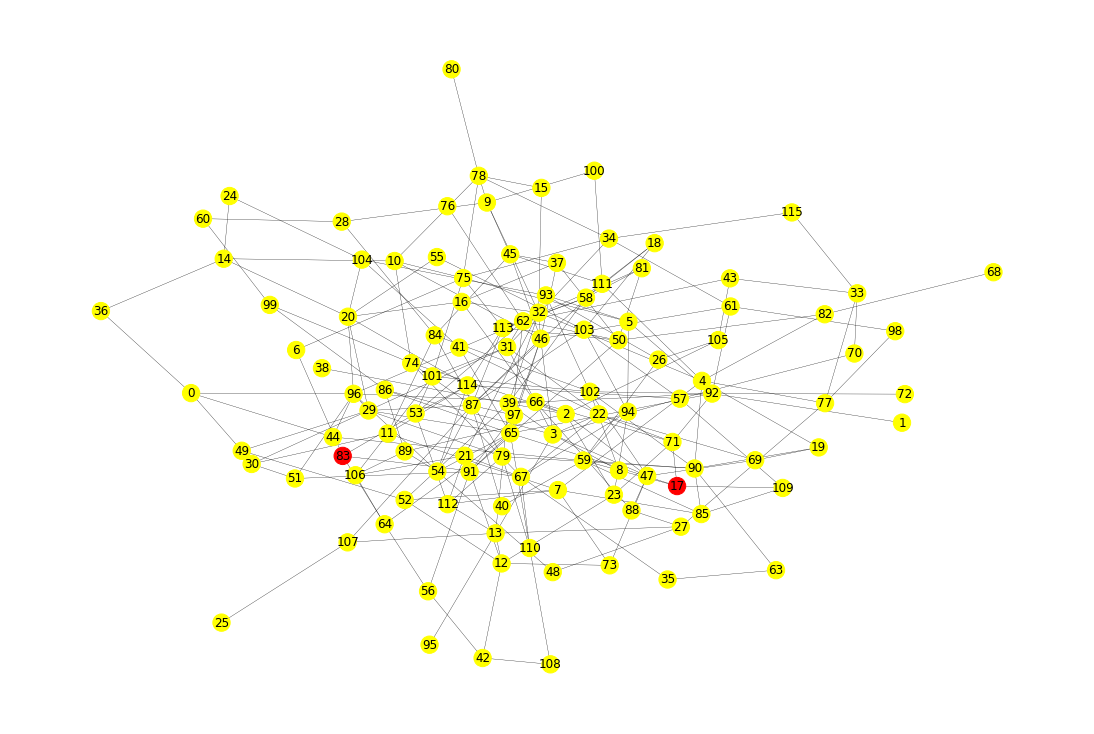

In [50]:
# Визуализируем граф
plt.figure(figsize=(15,10))
nx.draw(G,pos=pos, with_labels=True, node_size=300, width=0.3, node_color=color_map, font_color='black')

In [51]:
# Разрушение графа
def remove_and_distribution_loading(G):
    G = G.copy()
    count_of_nodes = []
    flag = True
    iteration_list = []
    iteration = 0
    while flag:
        if (max(nx.get_node_attributes(G, 'current_weight').values(), default=0) < max_load):
            flag = False
            break
        for node in [i for i in nx.get_node_attributes(G, 'current_weight') 
                     if nx.get_node_attributes(G, 'current_weight')[i]>=max_load]:
            load_of_node_value = G.nodes[node]['current_weight']
            if len(list(G.neighbors(node))) != 0:
                distribite_for_neighbors = load_of_node_value/len(list(G.neighbors(node)))
            for neighbor in G.neighbors(node):
                G.nodes[neighbor]['current_weight'] = G.nodes()[neighbor]['current_weight'] + distribite_for_neighbors
            G.remove_node(node)
            iteration+=1
           
        iteration_list.append(iteration)
        plt.figure(figsize=(15,10))
        nx.draw(G, pos=pos, with_labels=True, node_size=150, width=0.3, node_color='yellow', font_color='black')
        count_of_nodes.append(len(G.nodes))
        
    return count_of_nodes, iteration_list

In [52]:
def remove_and_distribution_loading_cycle(G):
    G = G.copy()
    list_of_current_weight = random.choices(range(5,9), k=116)
    list_of_current_weight = { i : list_of_current_weight[i] for i in range(0, len(list_of_current_weight) ) }
    nx.set_node_attributes(G, list_of_current_weight, 'current_weight')
    random_two_epicenters = random.sample(range(0,116), k=2)
    random_two_epicenters

    for j in random_two_epicenters:
        G.nodes[j]['current_weight'] = 10

    print(nx.get_node_attributes(G, 'current_weight'))
    color_map = ['red' if node == max_load else 'yellow' for node in nx.get_node_attributes(G, 'current_weight').values()]
    plt.figure(figsize=(15, 10))
    nx.draw(G, pos=pos, with_labels=True, node_size=200, width=0.3, node_color=color_map, font_color='black')
    count_of_nodes, iteration_list = remove_and_distribution_loading(G)
    return count_of_nodes, iteration_list

In [53]:
# Запускаем итерацию 
count_of_nodes, iteration_list = remove_and_distribution_loading_cycle(G)

Output hidden; open in https://colab.research.google.com to view.

In [54]:
count_of_nodes

[114, 113, 111, 109, 107, 104, 99, 88, 72, 47, 22, 9, 5, 4]

In [55]:
iteration_list

[2, 3, 5, 7, 9, 12, 17, 28, 44, 69, 94, 107, 111, 112]